In [73]:
import pandas as pd
import numpy as np

# Basic Exploratory Data Analysis:
## Financial Well-Being Survey
Consumer Financial Protection Bureau (CFPB), 2017

#### Items to address
* What questions can we address with each of these data sets?
* Breakdown of Financial Literacy Education & Behaviors, Home Ownership, Debt-to-Income by Demographic Information (Race/Ethnicity, Age, Gender, etc.)
* Any correlation between financial literacy education and each of our financial success metrics? Any differences among different demographics?
* Include data visualizations where appropriate


In [74]:
df = pd.read_csv("./NFWBS_PUF_2016_data.csv")

In [75]:
# Columns that most relate to our problem statement
columns_of_interest = [
    'PUF_ID',
    'agecat',
    'PPEDUC',
    'PPETHM',
    'PPGENDER',
    'PPINCIMP',
    'PPHHSIZE',
    'fpl',
    'PPREG4',
    'PPREG9',
    'FWB1_1',
    'FWB1_5',
    'FS2_3',
    'SUBKNOWL1',
    'ACT1_2',
    'PROPPLAN_3',
    'PROPPLAN_1',
    'MANAGE1_2',
    'MANAGE1_1',
    'MANAGE1_3',
    'SAVEHABIT',
    'AUTOMATED_1',
    'AUTOMATED_2',
    'SAVINGSRANGES',
    'HOUSING',
    'HOUSERANGES',
    'MORTGAGE',
    'PRODHAVE_8',
    'PRODUSE_1',
    'PRODUSE_2',
    'FWBscore',
    'FSscore'
]

In [76]:
# Column mapping to variable label; might come in handy when doing EDA
col_map = {
    'agecat':'Age Group',
    'PPEDUC':'Education (Highest Degree)',
    'PPETHM':'Race/Ethnicity',
    'PPGENDER':'Gender',
    'PPINCIMP':'Household Income',
    'PPHHSIZE':'Household Size',
    'fpl':'Federal Poverty Level',
    'PPREG4':'Census Region',
    'PPREG9':'Census Division',
    'FWB1_1':'I could handle a major unexpected expense.',
    'FWB1_5':'I am just getting by financially',
    'FS2_3':'I struggle to understand financial information',
    'SUBKNOWL1':'How would you assess your overall financial knowledge?',
    'ACT1_2':'I follow-through on financial goals I set for myself.',
    'PROPPLAN_3':'I set financial goals for what I want to achieve with my money',
    'PROPPLAN_1':'I consult my budget to see how much money I have left',
    'MANAGE1_2':'Stayed within your budget or spending plan',
    'MANAGE1_1':'Paid all your bills on time',
    'MANAGE1_3':'Paid off credit card balance in full',
    'SAVEHABIT':'Putting money into savings is a habit for me',
    'AUTOMATED_1':'A Retirement Savings Account',
    'AUTOMATED_2':'A Non-Retirement Savings Account',
    'SAVINGSRANGES':'How much money do you have in savings today?',
    'HOUSING':'Which one of the following best describes your housing situation?',
    'HOUSERANGES':'About how much do you pay for your home each month?',
    'MORTGAGE':'What do you owe on your home?',
    'PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',
    'PRODUSE_1':'Used payday loan or cash advance loan',
    'PRODUSE_2':'Used pawn loan or auto title loan',
    'FWBscore':'Financial Well-Being Scale score',
    'FSscore':'Financial Skill Scale score'
}

In [77]:
filtered_df = df.loc[:,columns_of_interest]
filtered_df.head()

,PUF_ID,agecat,PPEDUC,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,fpl,PPREG4,PPREG9,...,AUTOMATED_2,SAVINGSRANGES,HOUSING,HOUSERANGES,MORTGAGE,PRODHAVE_8,PRODUSE_1,PRODUSE_2,FWBscore,FSscore
0,10350,8,4,1,1,7,1,3,4,8,...,0,6,1,4,2,0,0,0,55,44
1,7740,3,2,1,1,6,2,3,2,3,...,0,2,1,4,2,0,0,0,51,43
2,13699,3,3,2,1,6,3,3,4,9,...,1,4,1,3,2,0,0,0,49,42
3,7267,3,2,1,1,8,1,3,3,7,...,-1,-1,-1,99,-2,0,0,0,49,42
4,7375,2,2,3,1,7,5,3,2,4,...,1,98,2,2,-2,0,0,1,49,42


### What questions can we address with this data set?

We can address questions related to: 
* the current state of financial well-being and financial skill levels within the population
* the current state of financial well-being and financial skill levels within sub-populations and different communities
* trends between financial skills and financial well-being among the general population
* trends between financial skills and financial well-being among different sub-populations

## Current state of financial literacy and financial success metrics

#### Breakdown of Financial Literacy Education & Behaviors by Demographic Information

In [188]:
demographic_cols = ['PUF_ID','PPGENDER','PPETHM','agecat']

In [189]:
fin_lit_cols = ['FSscore','FS2_3','SUBKNOWL1','ACT1_2','PROPPLAN_3','PROPPLAN_1','MANAGE1_2']
fin_lit_cols = demographic_cols + fin_lit_cols

In [190]:
fin_lit_df = filtered_df.loc[:,fin_lit_cols]
fin_lit_df = fin_lit_df.astype('int')
fin_lit_df = fin_lit_df.replace(value_map)
fin_lit_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,FSscore,FS2_3,SUBKNOWL1,ACT1_2,PROPPLAN_3,PROPPLAN_1,MANAGE1_2
0,10350,Male,"White, Non-Hispanic",75+,44,Often,5,Somewhat,Agree,Strongly agree,Often
1,7740,Male,"White, Non-Hispanic",35-44,43,Rarely,5,Somewhat,Disagree,Neither agree nor disagree,Often
2,13699,Male,"Black, Non-Hispanic",35-44,42,Sometimes,5,Somewhat,Agree,Agree,Sometimes
3,7267,Male,"White, Non-Hispanic",35-44,42,Sometimes,Refused,Refused,Neither agree nor disagree,Neither agree nor disagree,Often
4,7375,Male,"Other, Non-Hispanic",25-34,42,Sometimes,4,Somewhat,Neither agree nor disagree,Neither agree nor disagree,Sometimes


--- GENDER ---

In [191]:
fs_score_gender = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).sum()
fs_score_gender['Participant_Count'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_gender['FSscore_avg'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).mean()
fs_score_gender['FSscore_median'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).median()
fs_score_gender

,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPGENDER,,,,
Female,151825,3042,49.909599,49
Male,172473,3352,51.453759,51


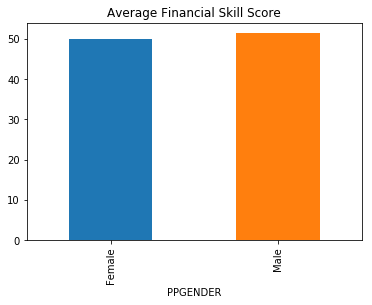

In [192]:
fs_score_gender['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

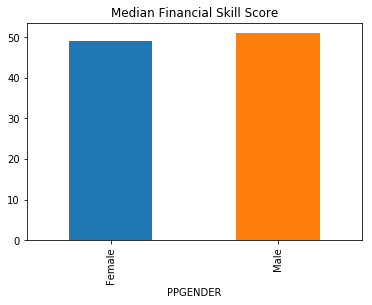

In [193]:
fs_score_gender['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- RACE/ETHNICITY ---

In [194]:
fs_score_eth = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).sum()
fs_score_eth['Participant_Count'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_eth['FSscore_avg'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).mean()
fs_score_eth['FSscore_median'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).median()
fs_score_eth


,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPETHM,,,,
"Black, Non-Hispanic",34979,685,51.064234,50
Hispanic,42463,875,48.529143,47
"Other, Non-Hispanic",16790,336,49.970238,48
"White, Non-Hispanic",230066,4498,51.148510,51


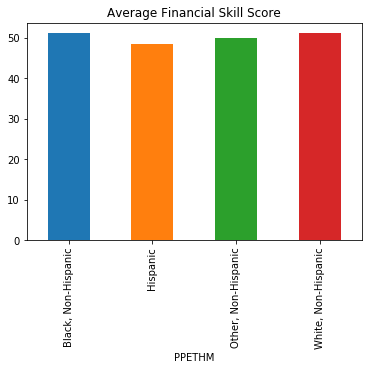

In [195]:
fs_score_eth['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

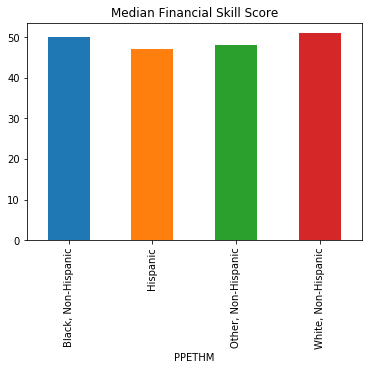

In [196]:
fs_score_eth['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- AGE ---

In [197]:
fs_score_age = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).sum()
fs_score_age['Participant_Count'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_age['FSscore_avg'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).mean()
fs_score_age['FSscore_median'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).median()
fs_score_age

,FSscore,Participant_Count,FSscore_avg,FSscore_median
agecat,,,,
18-24,20419,414,49.321256,48
25-34,56148,1116,50.311828,49
35-44,41465,828,50.078502,48
45-54,53531,1075,49.796279,49
55-61,36127,708,51.026836,50
62-69,52989,1021,51.899119,51
70-74,25465,496,51.340726,51
75+,38154,736,51.839674,52


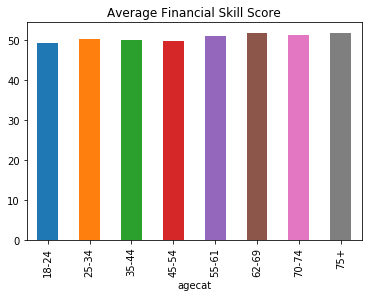

In [198]:
fs_score_age['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

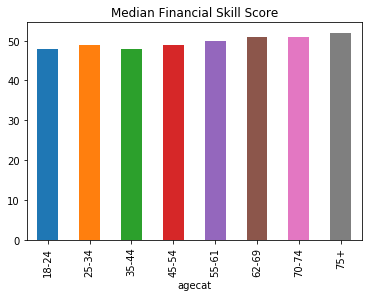

In [199]:
fs_score_age['FSscore_median'].plot.bar(title='Median Financial Skill Score')

#### Breakdown of Home Ownership by Demographic Information

In [265]:
homeown_cols = ['HOUSING','HOUSERANGES','MORTGAGE']
homeown_cols = demographic_cols + homeown_cols

In [266]:
homeown_df = filtered_df.loc[:,homeown_cols]
homeown_df = homeown_df.astype('int')
homeown_df = homeown_df.replace(value_map)
homeown_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,HOUSING,HOUSERANGES,MORTGAGE
0,10350,Male,"White, Non-Hispanic",75+,I own my home,4,"$50,000-199,999"
1,7740,Male,"White, Non-Hispanic",35-44,I own my home,4,"$50,000-199,999"
2,13699,Male,"Black, Non-Hispanic",35-44,I own my home,3,"$50,000-199,999"
3,7267,Male,"White, Non-Hispanic",35-44,Refused,99,Question not asked because respondent not in i...
4,7375,Male,"Other, Non-Hispanic",25-34,I rent,2,Question not asked because respondent not in i...


--- GENDER ---

In [267]:
gender_totals = homeown_df.loc[:,['PUF_ID','PPGENDER']].groupby(['PPGENDER']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
gender_totals

,PPGENDER,Count_Total
0,Female,3042
1,Male,3352


In [357]:
homeown_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSING']].groupby(['PPGENDER','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_gender = homeown_gender.merge(gender_totals)
homeown_gender['Gender_proportion'] = homeown_gender['Participant_Count'] / homeown_gender['Count_Total']
homeown_gender = homeown_gender.set_index(['HOUSING'])
homeown_gender

,PPGENDER,Participant_Count,Count_Total,Gender_proportion
HOUSING,,,,
I do not currently own or rent,Female,262,3042,0.086128
I own my home,Female,1958,3042,0.643655
I rent,Female,799,3042,0.262656
Refused,Female,23,3042,0.007561
I do not currently own or rent,Male,283,3352,0.084427
I own my home,Male,2206,3352,0.658115
I rent,Male,844,3352,0.251790
Refused,Male,19,3352,0.005668


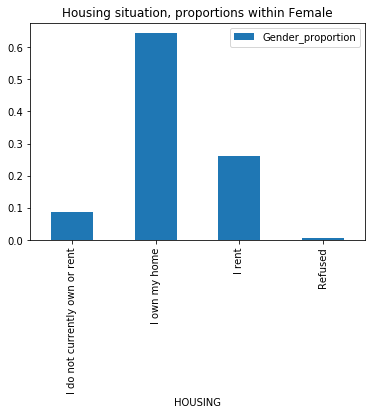

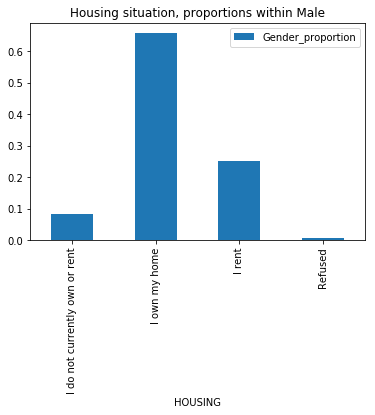

In [360]:
gender_vals = homeown_gender['PPGENDER'].unique()
for g in gender_vals:
    homeown_gender[homeown_gender['PPGENDER'] == g].loc[:,['Gender_proportion']].plot.bar(title='Housing situation, proportions within %s' % (g))


In [361]:
homeown_range_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSERANGES']].groupby(['PPGENDER','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_gender = homeown_range_gender.merge(gender_totals)
homeown_range_gender['Gender_proportion'] = homeown_range_gender['Participant_Count'] / homeown_range_gender['Count_Total']
homeown_range_gender = homeown_range_gender.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_gender = homeown_range_gender.set_index(['HOUSERANGES'])
homeown_range_gender

,PPGENDER,Participant_Count,Count_Total,Gender_proportion
HOUSERANGES,,,,
Refused,Female,41,3042,0.013478
Less than $300,Female,499,3042,0.164037
$300-499,Female,226,3042,0.074293
$500-749,Female,459,3042,0.150888
$750-999,Female,403,3042,0.132479
"$1,000-1,499",Female,455,3042,0.149573
"$1,500-1,999",Female,232,3042,0.076266
"$2,000 or more",Female,235,3042,0.077252
I dont know,Female,129,3042,0.042406


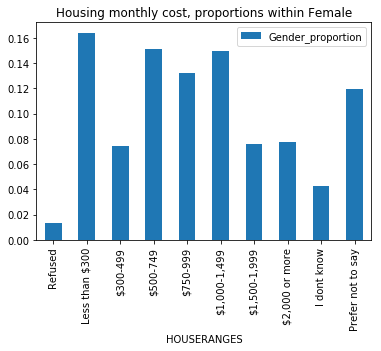

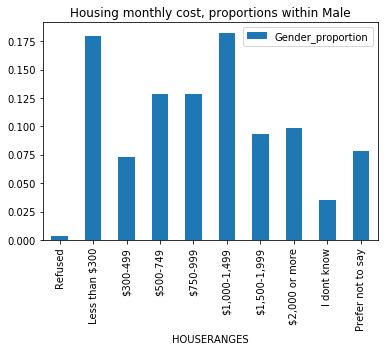

In [369]:
# gender_vals = homeown_gender['PPGENDER'].unique()
for g in gender_vals:
    homeown_range_gender[homeown_range_gender['PPGENDER'] == g].loc[:,['Gender_proportion']].plot.bar(title='Housing monthly cost, proportions within %s' % (g))
    

--- RACE/ETHNICITY ---

In [238]:
eth_totals = homeown_df.loc[:,['PUF_ID','PPETHM']].groupby(['PPETHM']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
eth_totals


,PPETHM,Count_Total
0,"Black, Non-Hispanic",685
1,Hispanic,875
2,"Other, Non-Hispanic",336
3,"White, Non-Hispanic",4498


In [364]:
homeown_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSING']].groupby(['PPETHM','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_eth = homeown_eth.merge(eth_totals)
homeown_eth['Ethnicity_proportion'] = homeown_eth['Participant_Count'] / homeown_eth['Count_Total']
homeown_eth = homeown_eth.set_index(['HOUSING'])
homeown_eth

,PPETHM,Participant_Count,Count_Total,Ethnicity_proportion
HOUSING,,,,
I do not currently own or rent,"Black, Non-Hispanic",76,685,0.110949
I own my home,"Black, Non-Hispanic",308,685,0.449635
I rent,"Black, Non-Hispanic",296,685,0.432117
Refused,"Black, Non-Hispanic",5,685,0.007299
I do not currently own or rent,Hispanic,101,875,0.115429
I own my home,Hispanic,396,875,0.452571
I rent,Hispanic,372,875,0.425143
Refused,Hispanic,6,875,0.006857
I do not currently own or rent,"Other, Non-Hispanic",41,336,0.122024


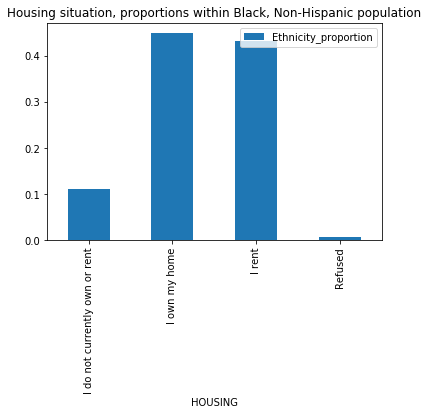

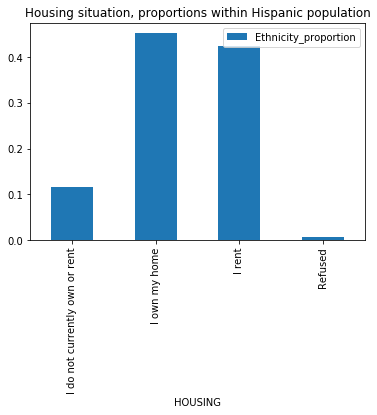

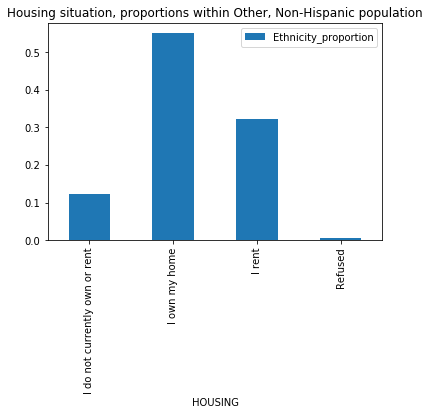

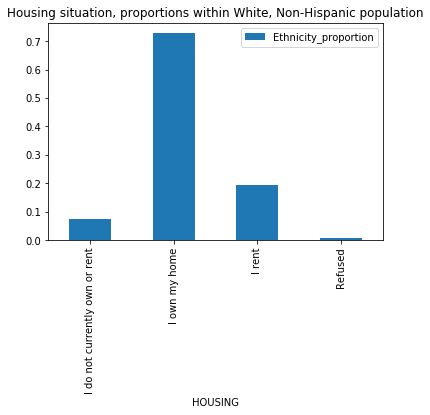

In [367]:
eth_vals = homeown_eth['PPETHM'].unique()
for g in eth_vals:
    homeown_eth[homeown_eth['PPETHM'] == g].loc[:,['Ethnicity_proportion']].plot.bar(title='Housing situation, proportions within %s population' % (g))



In [371]:
homeown_range_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSERANGES']].groupby(['PPETHM','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_eth = homeown_range_eth.merge(eth_totals)
homeown_range_eth['Ethnicity_proportion'] = homeown_range_eth['Participant_Count'] / homeown_range_eth['Count_Total']
homeown_range_eth = homeown_range_eth.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_eth = homeown_range_eth.set_index(['HOUSERANGES'])
homeown_range_eth

,PPETHM,Participant_Count,Count_Total,Ethnicity_proportion
HOUSERANGES,,,,
Refused,"Black, Non-Hispanic",6,685,0.008759
Less than $300,"Black, Non-Hispanic",75,685,0.109489
$300-499,"Black, Non-Hispanic",51,685,0.074453
$500-749,"Black, Non-Hispanic",143,685,0.208759
$750-999,"Black, Non-Hispanic",112,685,0.163504
"$1,000-1,499","Black, Non-Hispanic",92,685,0.134307
"$1,500-1,999","Black, Non-Hispanic",46,685,0.067153
"$2,000 or more","Black, Non-Hispanic",52,685,0.075912
I dont know,"Black, Non-Hispanic",27,685,0.039416


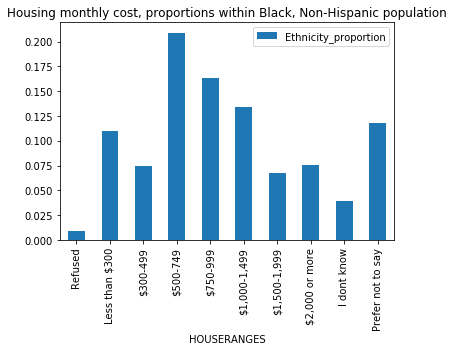

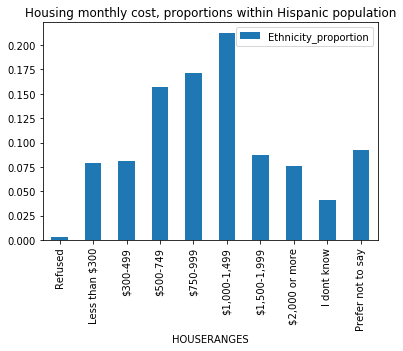

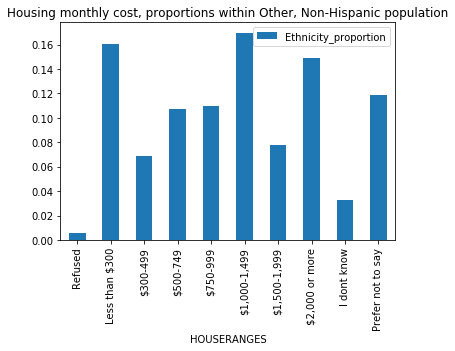

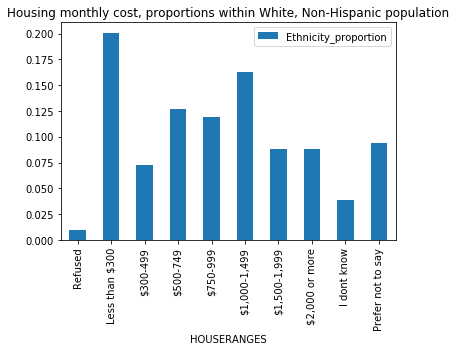

In [372]:
# eth_vals = homeown_eth['PPETHM'].unique()
for g in eth_vals:
    homeown_range_eth[homeown_range_eth['PPETHM'] == g].loc[:,['Ethnicity_proportion']].plot.bar(title='Housing monthly cost, proportions within %s population' % (g))


--- AGE ---

In [245]:
age_totals = homeown_df.loc[:,['PUF_ID','agecat']].groupby(['agecat']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
age_totals

,agecat,Count_Total
0,18-24,414
1,25-34,1116
2,35-44,828
3,45-54,1075
4,55-61,708
5,62-69,1021
6,70-74,496
7,75+,736


In [373]:
homeown_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSING']].groupby(['agecat','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_age = homeown_age.merge(age_totals)
homeown_age['Age_proportion'] = homeown_age['Participant_Count'] / homeown_age['Count_Total']
homeown_age = homeown_age.set_index(['HOUSING'])
homeown_age

,agecat,Participant_Count,Count_Total,Age_proportion
HOUSING,,,,
I do not currently own or rent,18-24,193,414,0.466184
I own my home,18-24,32,414,0.077295
I rent,18-24,184,414,0.444444
Refused,18-24,5,414,0.012077
I do not currently own or rent,25-34,173,1116,0.155018
I own my home,25-34,405,1116,0.362903
I rent,25-34,526,1116,0.471326
Refused,25-34,12,1116,0.010753
I do not currently own or rent,35-44,46,828,0.055556


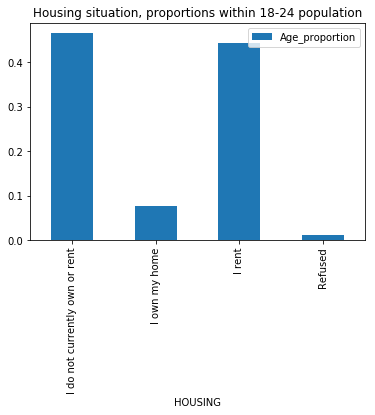

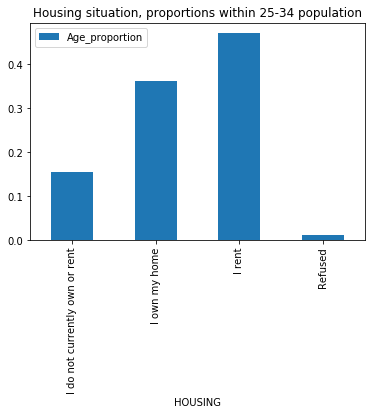

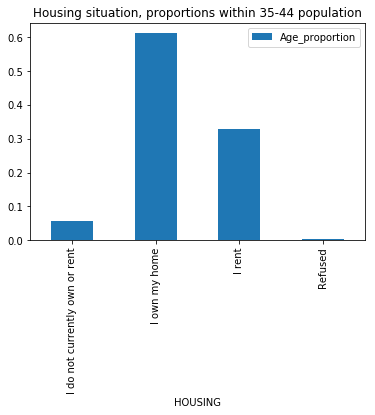

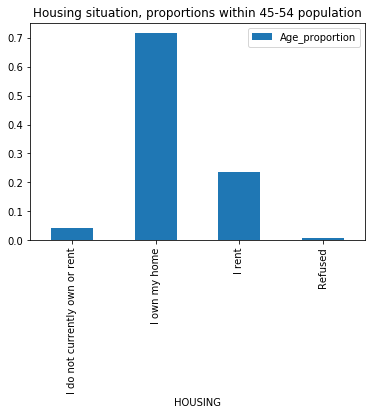

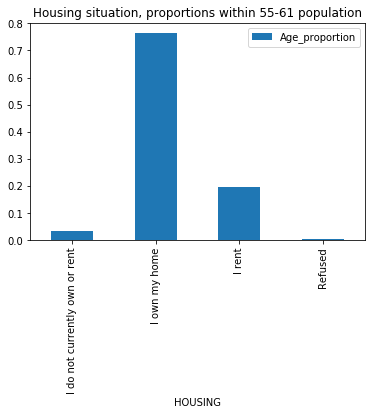

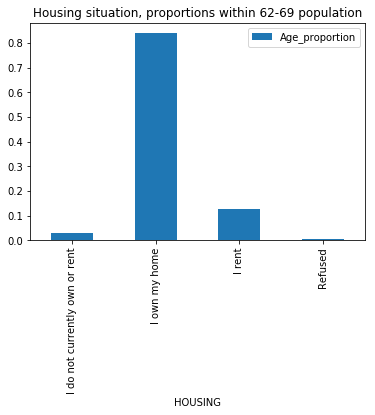

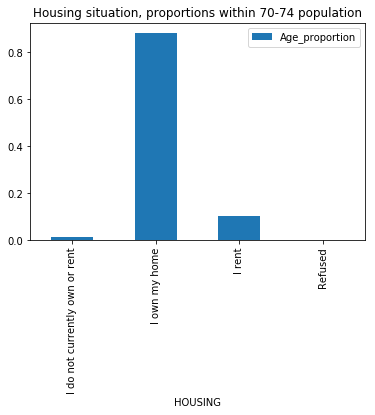

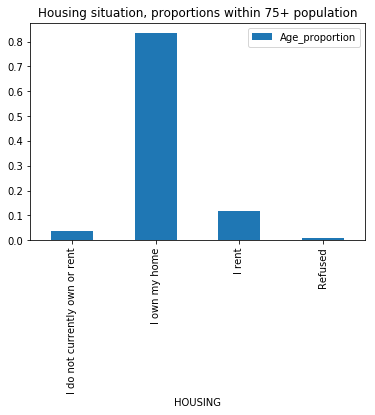

In [374]:
age_vals = homeown_age['agecat'].unique()
for g in age_vals:
    homeown_age[homeown_age['agecat'] == g].loc[:,['Age_proportion']].plot.bar(title='Housing situation, proportions within %s population' % (g))


In [376]:
homeown_range_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSERANGES']].groupby(['agecat','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_age = homeown_range_age.merge(age_totals)
homeown_range_age['Age_proportion'] = homeown_range_age['Participant_Count'] / homeown_range_age['Count_Total']
homeown_range_age = homeown_range_age.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_age = homeown_range_age.set_index(['HOUSERANGES'])
homeown_range_age

,agecat,Participant_Count,Count_Total,Age_proportion
HOUSERANGES,,,,
Less than $300,18-24,52,414,0.125604
$300-499,18-24,49,414,0.118357
$500-749,18-24,98,414,0.236715
$750-999,18-24,56,414,0.135266
"$1,000-1,499",18-24,39,414,0.094203
"$1,500-1,999",18-24,12,414,0.028986
"$2,000 or more",18-24,15,414,0.036232
I dont know,18-24,67,414,0.161836
Prefer not to say,18-24,26,414,0.062802


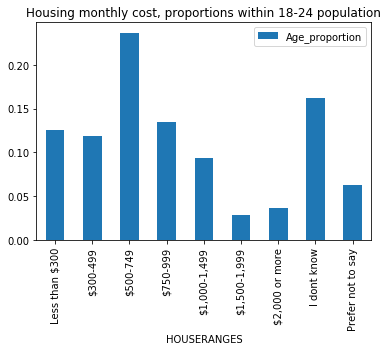

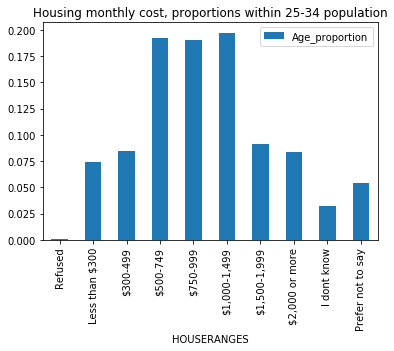

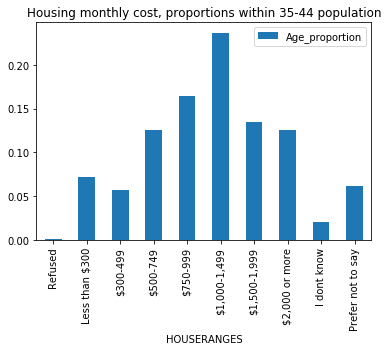

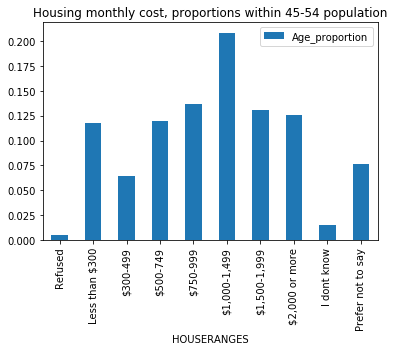

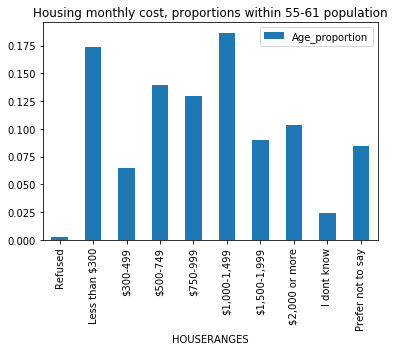

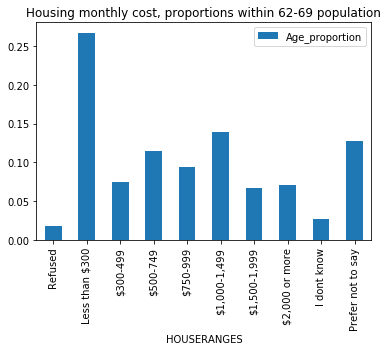

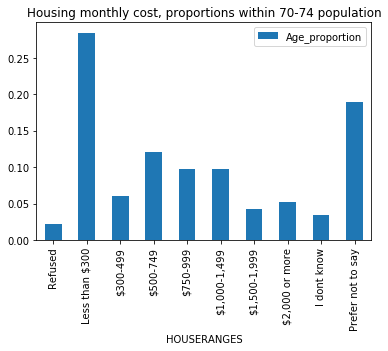

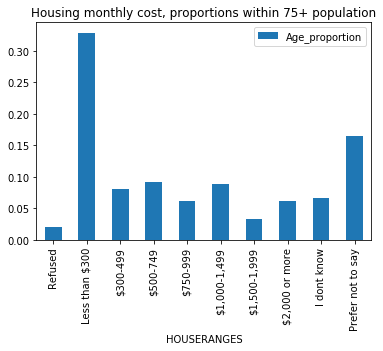

In [377]:
# age_vals = homeown_age['agecat'].unique()
for g in age_vals:
    homeown_range_age[homeown_range_age['agecat'] == g].loc[:,['Age_proportion']].plot.bar(title='Housing monthly cost, proportions within %s population' % (g))


#### Breakdown of Debt-to-Income Ratio by Demographic Information

In [311]:
d_to_i_cols = ['PPINCIMP','PRODHAVE_8','PRODUSE_1','PRODUSE_2']
d_to_i_cols = demographic_cols + d_to_i_cols

In [313]:
income_df = filtered_df.loc[:,d_to_i_cols]
income_df = income_df.astype('int')
income_df = income_df.replace(value_map)
income_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,PPINCIMP,PRODHAVE_8,PRODUSE_1,PRODUSE_2
0,10350,Male,"White, Non-Hispanic",75+,7,No,No,No
1,7740,Male,"White, Non-Hispanic",35-44,6,No,No,No
2,13699,Male,"Black, Non-Hispanic",35-44,6,No,No,No
3,7267,Male,"White, Non-Hispanic",35-44,8,No,No,No
4,7375,Male,"Other, Non-Hispanic",25-34,7,No,No,Yes


--- GENDER ---

In [378]:
income_gender = income_df.loc[:,['PUF_ID','PPGENDER','PPINCIMP']].groupby(['PPGENDER','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_gender = income_gender.merge(gender_totals)
income_gender['Proportion'] = income_gender['Participant_Count'] / income_gender['Count_Total']
income_gender = income_gender.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_gender = income_gender.set_index(['PPINCIMP'])
income_gender

,PPGENDER,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000",Female,406,3042,0.133465
"$20,000 to $29,999",Female,282,3042,0.092702
"$30,000 to $39,999",Female,313,3042,0.102893
"$40,000 to $49,999",Female,231,3042,0.075937
"$50,000 to $59,999",Female,255,3042,0.083826
"$60,000 to $74,999",Female,293,3042,0.096318
"$75,000 to $99,999",Female,415,3042,0.136423
"$100,000 to $149,999",Female,483,3042,0.158777
"$150,000 or more",Female,364,3042,0.119658


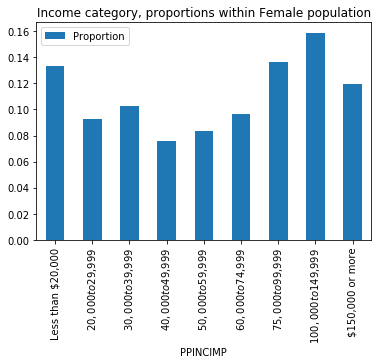

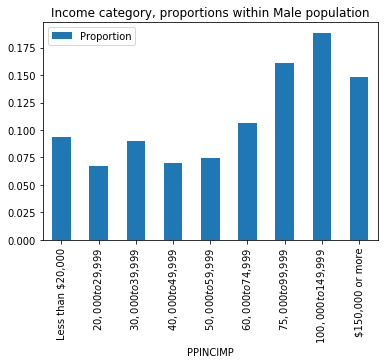

In [379]:
gender_vals = income_gender['PPGENDER'].unique()
for g in gender_vals:
    income_gender[income_gender['PPGENDER'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [390]:
debt_gender = income_df.loc[:,['PUF_ID','PPGENDER','PRODUSE_1']].groupby(['PPGENDER','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_gender = debt_gender.merge(gender_totals)
debt_gender['Proportion'] = debt_gender['Participant_Count'] / debt_gender['Count_Total']
debt_gender = debt_gender.set_index(['PRODUSE_1'])
debt_gender

,PPGENDER,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,Female,2950,3042,0.969757
Yes,Female,92,3042,0.030243
No,Male,3271,3352,0.975835
Yes,Male,81,3352,0.024165


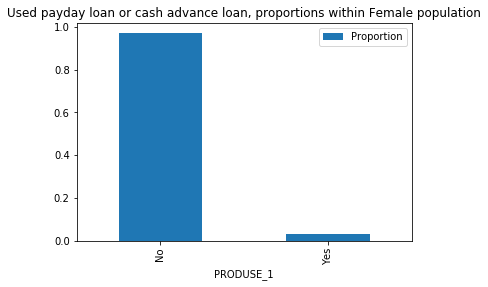

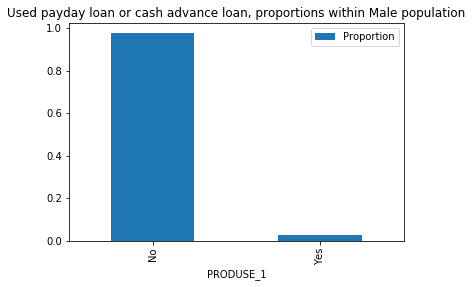

In [391]:
for g in gender_vals:
    debt_gender[debt_gender['PPGENDER'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


--- RACE/ETHNICITY ---

In [381]:
income_eth = income_df.loc[:,['PUF_ID','PPETHM','PPINCIMP']].groupby(['PPETHM','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_eth = income_eth.merge(eth_totals)
income_eth['Proportion'] = income_eth['Participant_Count'] / income_eth['Count_Total']
income_eth = income_eth.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_eth = income_eth.set_index(['PPINCIMP'])
income_eth

,PPETHM,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000","Black, Non-Hispanic",164,685,0.239416
"$20,000 to $29,999","Black, Non-Hispanic",63,685,0.091971
"$30,000 to $39,999","Black, Non-Hispanic",74,685,0.108029
"$40,000 to $49,999","Black, Non-Hispanic",58,685,0.084672
"$50,000 to $59,999","Black, Non-Hispanic",53,685,0.077372
"$60,000 to $74,999","Black, Non-Hispanic",50,685,0.072993
"$75,000 to $99,999","Black, Non-Hispanic",83,685,0.121168
"$100,000 to $149,999","Black, Non-Hispanic",76,685,0.110949
"$150,000 or more","Black, Non-Hispanic",64,685,0.093431


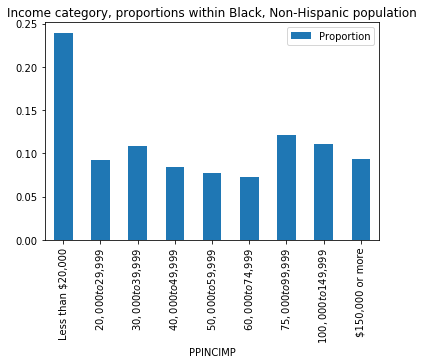

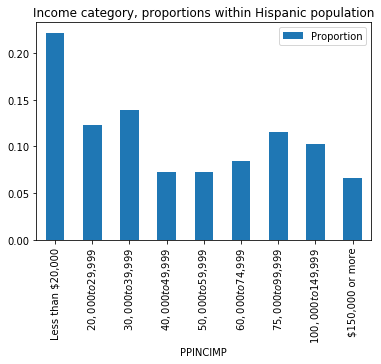

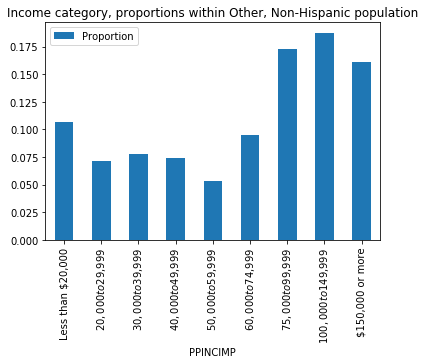

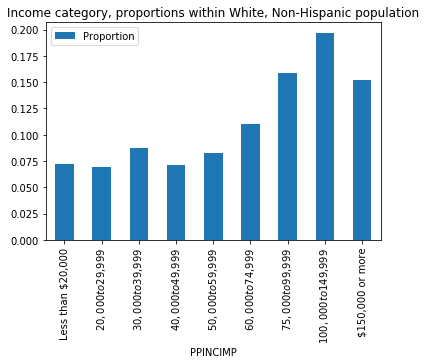

In [382]:
eth_vals = income_eth['PPETHM'].unique()
for g in eth_vals:
    income_eth[income_eth['PPETHM'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [395]:
debt_eth = income_df.loc[:,['PUF_ID','PPETHM','PRODUSE_1']].groupby(['PPETHM','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_eth = debt_eth.merge(eth_totals)
debt_eth['Proportion'] = debt_eth['Participant_Count'] / debt_eth['Count_Total']
debt_eth = debt_eth.set_index(['PRODUSE_1'])
debt_eth

,PPETHM,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,"Black, Non-Hispanic",633,685,0.924088
Yes,"Black, Non-Hispanic",52,685,0.075912
No,Hispanic,836,875,0.955429
Yes,Hispanic,39,875,0.044571
No,"Other, Non-Hispanic",328,336,0.976190
Yes,"Other, Non-Hispanic",8,336,0.023810
No,"White, Non-Hispanic",4424,4498,0.983548
Yes,"White, Non-Hispanic",74,4498,0.016452


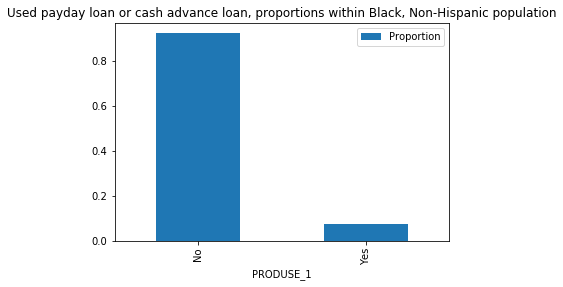

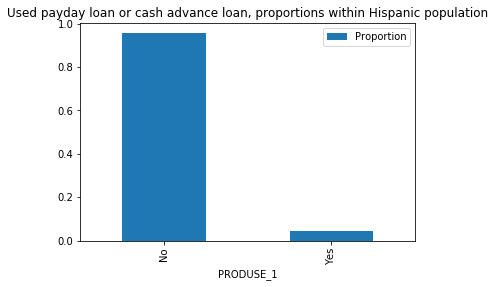

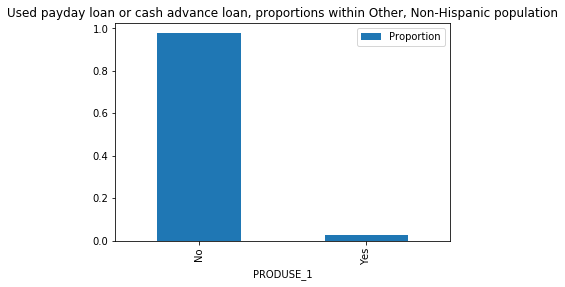

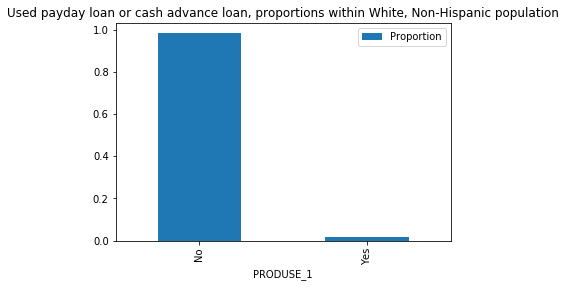

In [396]:
for g in eth_vals:
    debt_eth[debt_eth['PPETHM'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


--- AGE ---

In [384]:
income_age = income_df.loc[:,['PUF_ID','agecat','PPINCIMP']].groupby(['agecat','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_age = income_age.merge(age_totals)
income_age['Proportion'] = income_age['Participant_Count'] / income_age['Count_Total']
income_age = income_age.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_age = income_age.set_index(['PPINCIMP'])
income_age

,agecat,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000",18-24,83,414,0.200483
"$20,000 to $29,999",18-24,36,414,0.086957
"$30,000 to $39,999",18-24,36,414,0.086957
"$40,000 to $49,999",18-24,36,414,0.086957
"$50,000 to $59,999",18-24,30,414,0.072464
"$60,000 to $74,999",18-24,34,414,0.082126
"$75,000 to $99,999",18-24,45,414,0.108696
"$100,000 to $149,999",18-24,70,414,0.169082
"$150,000 or more",18-24,44,414,0.106280


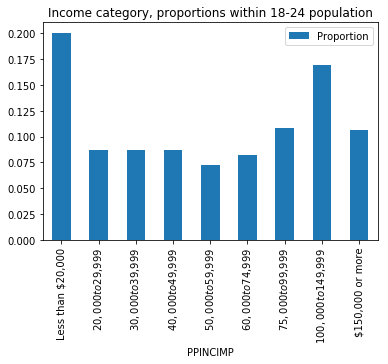

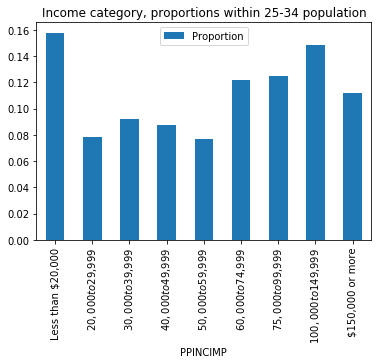

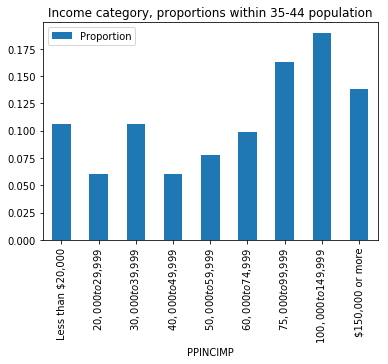

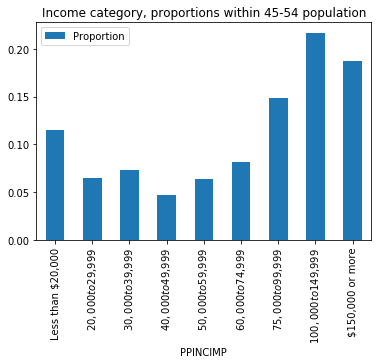

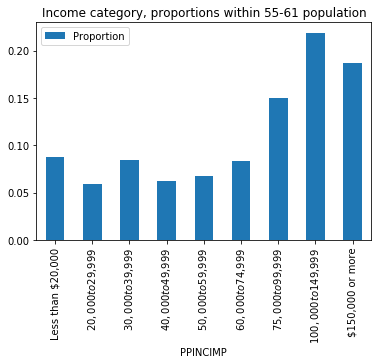

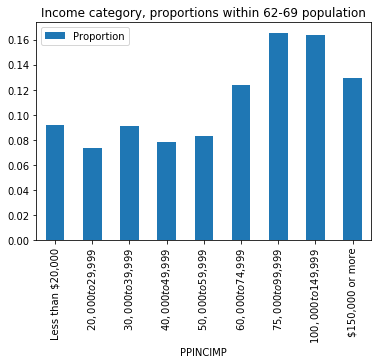

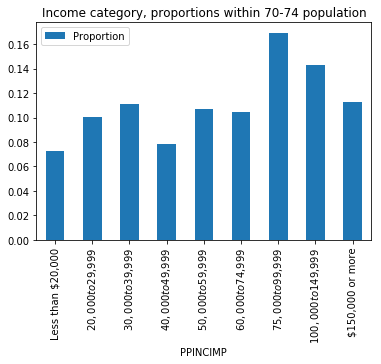

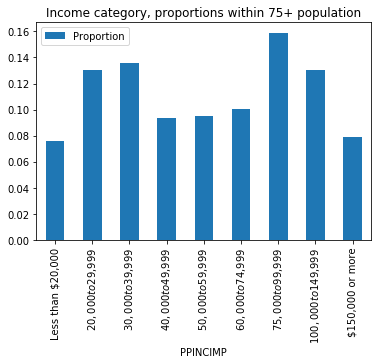

In [385]:
age_vals = income_age['agecat'].unique()
for g in age_vals:
    income_age[income_age['agecat'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [400]:
debt_age = income_df.loc[:,['PUF_ID','agecat','PRODUSE_1']].groupby(['agecat','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_age = debt_age.merge(age_totals)
debt_age['Proportion'] = debt_age['Participant_Count'] / debt_age['Count_Total']
debt_age = debt_age.set_index(['PRODUSE_1'])
debt_age

,agecat,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,18-24,404,414,0.975845
Yes,18-24,10,414,0.024155
No,25-34,1066,1116,0.955197
Yes,25-34,50,1116,0.044803
No,35-44,789,828,0.952899
Yes,35-44,39,828,0.047101
No,45-54,1047,1075,0.973953
Yes,45-54,28,1075,0.026047
No,55-61,689,708,0.973164


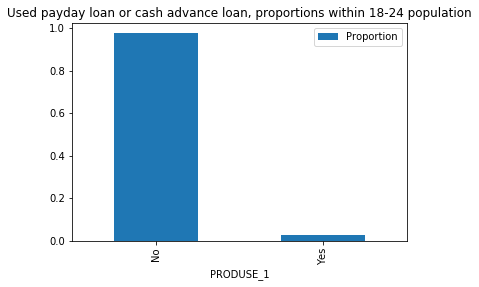

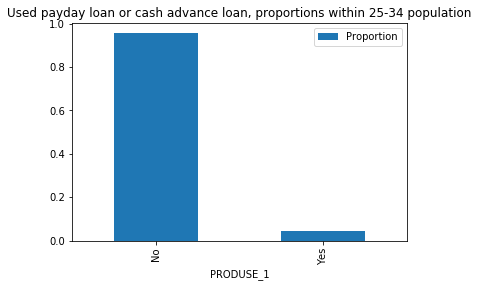

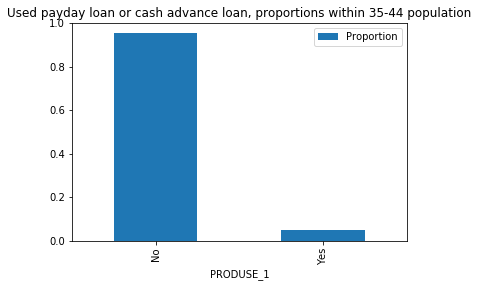

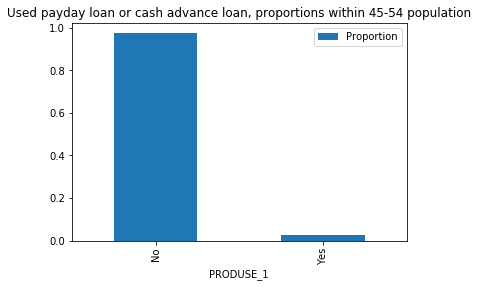

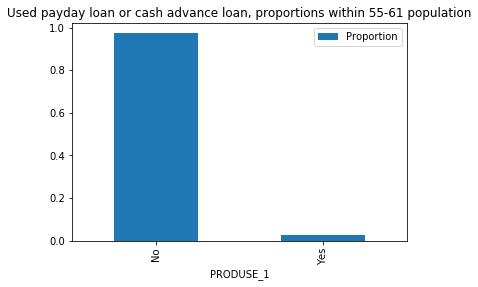

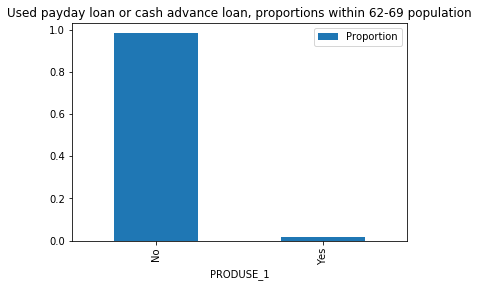

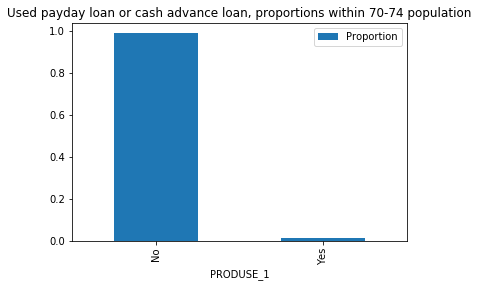

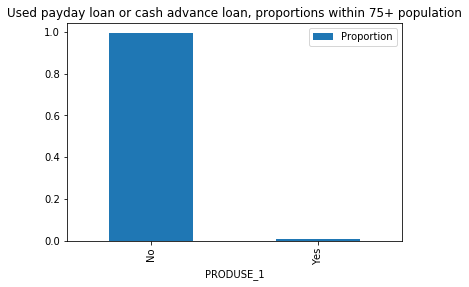

In [401]:
for g in age_vals:
    debt_age[debt_age['agecat'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


## Patterns between financial literacy and financial success metrics

#### Any correlation between financial literacy education and each of our financial success metrics?

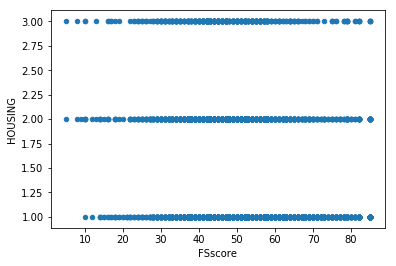

In [462]:
# For reference:
# "HOUSING":{
#   -1: "Refused",
#   1: "I own my home",
#   2: "I rent",
#   3: "I do not currently own or rent"
# },

mod_df = filtered_df.copy()
mod_df = mod_df[mod_df['FSscore'] > 0]
mod_df = mod_df[mod_df['HOUSING'] > 0]
mod_df.loc[:,['FSscore','HOUSING']].plot.scatter(y='HOUSING',x='FSscore')

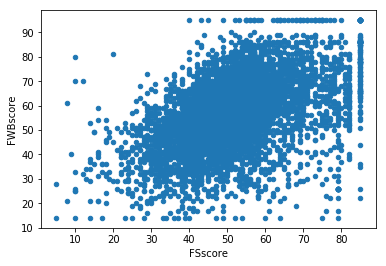

In [484]:
mod_df = mod_df[mod_df['FWBscore'] > 0]
mod_df.loc[:,['FSscore','FWBscore']].plot.scatter(y='FWBscore',x='FSscore')

#### Any differences among different demographics?

In [485]:
mod_df = mod_df.replace({
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
})

--- GENDER ---

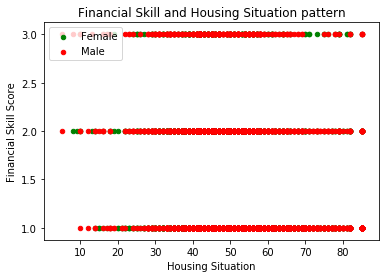

In [486]:
from matplotlib import pyplot as plt
colors = {
    'Female':'green',
    'Male':'red'
}
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPGENDER'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


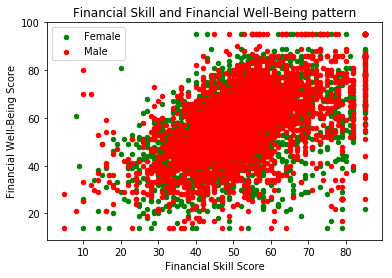

In [487]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPGENDER'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being pattern')


--- RACE/ETHNICITY ---

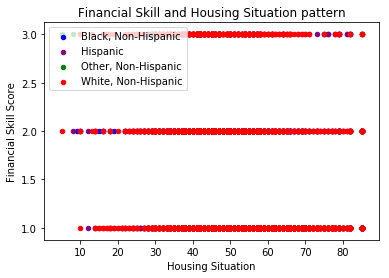

In [488]:
colors = {
    "White, Non-Hispanic":"red",
    "Black, Non-Hispanic":"blue",
    "Other, Non-Hispanic":"green",
    "Hispanic":"purple"
}
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


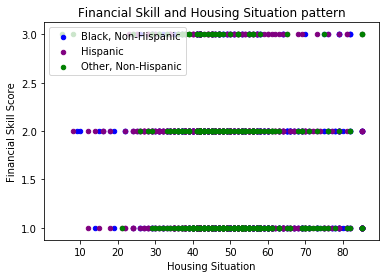

In [489]:
_, ax = plt.subplots()
for key, group in mod_df[mod_df['PPETHM'] != 'White, Non-Hispanic'].groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


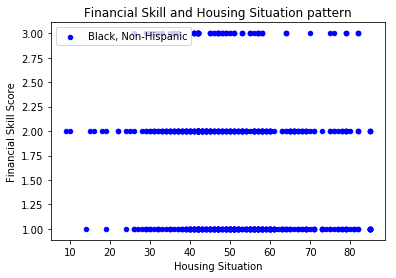

In [490]:
_, ax = plt.subplots()
for key, group in mod_df[mod_df['PPETHM'] == 'Black, Non-Hispanic'].groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


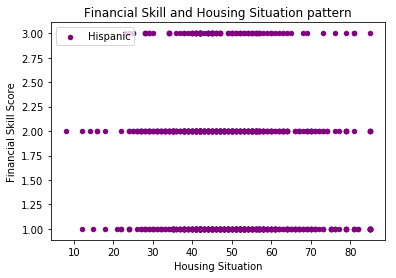

In [491]:
_, ax = plt.subplots()
for key, group in mod_df[mod_df['PPETHM'] == 'Hispanic'].groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


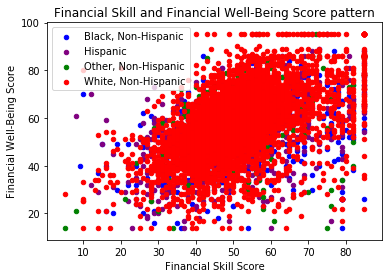

In [493]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being Score pattern')


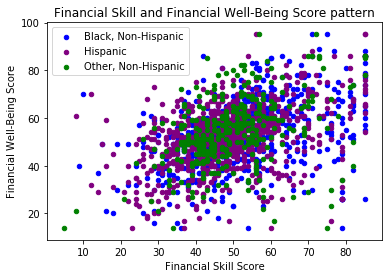

In [494]:
_, ax = plt.subplots()
for key, group in mod_df[mod_df['PPETHM'] != 'White, Non-Hispanic'].groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being Score pattern')


--- AGE ---

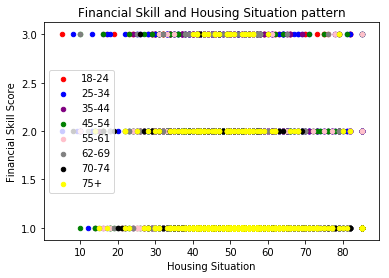

In [495]:
colors = {
    "18-24":'red',
    "25-34":'blue',
    "35-44":'purple',
    "45-54":'green',
    "55-61":'pink',
    "62-69":'grey',
    "70-74":'black',
    "75+":'yellow'
}
_, ax = plt.subplots()
for key, group in mod_df.groupby('agecat'):
    group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
ax.set_xlabel('Housing Situation')
ax.set_ylabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Housing Situation pattern')


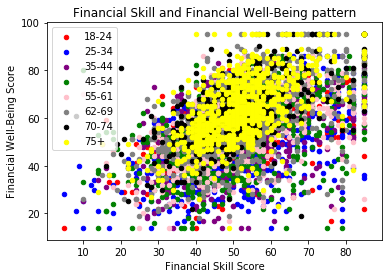

In [498]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('agecat'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being pattern')


In [310]:
# Value mapping to actual responses; might come in handy when doing EDA
value_map = {
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
    "PPEDUC":{
      1: "Less than high school",
      2: "High school degree/GED",
      3: "Some college/Associate",
      4: "Bachelors degree",
      5: "Graduate/professional degree"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
#     "PPINCIMP":{
#       1: "Less than $20,000",
#       2: "$20,000 to $29,999",
#       3: "$30,000 to $39,999",
#       4: "$40,000 to $49,999",
#       5: "$50,000 to $59,999",
#       6: "$60,000 to $74,999",
#       7: "$75,000 to $99,999",
#       8: "$100,000 to $149,999",
#       9: "$150,000 or more"
#     },
    "PPHHSIZE":{
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5+"
    },
    "fpl":{
      1: "<100% FPL",
      2: "100%-199% FPL",
      3: "200%+ FPL"
    },
    "PPREG4":{
      1: "Northeast",
      2: "Midwest",
      3: "South",
      4: "West"
    },
    "PPREG9":{
      1: "New England",
      2: "Mid-Atlantic",
      3: "East-North Central",
      4: "West-North Central",
      5: "South Atlantic",
      6: "East-South Central",
      7: "West-South Central",
      8: "Mountain",
      9: "Pacific"
    },
    "FWB1_1":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FWB1_5":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FS2_3":{
      -1: "Refused",
      1: "Never",
      2: "Rarely",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SUBKNOWL1":{
      -1: "Refused",
      1: "1 - Very low",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7 - Very high"
    },
    "ACT1_2":{
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "PROPPLAN_1":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "PROPPLAN_3":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "MANAGE1_1":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_2":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_3":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SAVEHABIT":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Disagree slightly",
      4: "Agree slightly",
      5: "Agree",
      6: "Strongly agree"
    },
    "AUTOMATED_1":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "AUTOMATED_2":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "SAVINGSRANGES":{
      -1: "Refused",
      1: "0",
      2: "$1-99",
      3: "$100-999",
      4: "$1,000-4,999",
      5: "$5,000-19,999",
      6: "$20,000-74,999",
      7: "$75,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "HOUSING":{
      -1: "Refused",
      1: "I own my home",
      2: "I rent",
      3: "I do not currently own or rent"
    },
#     "HOUSERANGES":{
#       -1: "Refused",
#       1: "Less than $300",
#       2: "$300-499",
#       3: "$500-749",
#       4: "$750-999",
#       5: "$1,000-1,499",
#       6: "$1,500-1,999",
#       7: "$2,000 or more",
#       98: "I dont know",
#       99: "Prefer not to say"
#     },
    "MORTGAGE":{
      -2: "Question not asked because respondent not in item base",
      -1: "Refused",
      1: "Less than $50,000",
      2: "$50,000-199,999",
      3: "$200,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "PRODHAVE_8":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_2":{
      0: "No",
      1: "Yes"
    },
    "FWBscore":{
      -4: "Response not written to database",
      -1: "Refused"
    },
#     "FSscore":{
#       -1: "Refused"
#     },
}